# What do you see when you look up?

> ### _This work is done in order to understand the APIs of FastAI in a better fashion and how the model tuning works in an incremental fashion_

## Problem Statement - Classify the Clouds in one of the ten cohorts
> #### The categories are _Altocumulus, Altostratus, Cirroculumulus, Cirrostratus, Cirrus, Cumulonimbus, Cumulus, Nimbostratus, Stratocumulus, Stratus_

## Data - The data analysed in the present work is present [here](http://https://www.kaggle.com/datasets/imbikramsaha/howard-cloudx)

> ### Some information about the clouds
> ### Clouds are classified according to their height above and appearance (texture) from the ground.
> ### The following cloud roots and translations summarize the components of this classification system
 > -  Cirro-: curl of hair, high; 
 > -  Alto-: mid; 
 > -  Strato-: layer;
 > -  Nimbo-: rain, precipitation;
 > -  Cumulo-: heap. 

> ## Imports and Downloads

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
input_dir = "/kaggle/input/"
dirs = ["howard-cloudx", "clouds", "cloudtest"]
for d in dirs:
    for dirname, _, filenames in os.walk(input_dir + d):
        counter = 0
        for filename in filenames:
            counter = counter + 1
        print(f"Number of files loaded:{counter}")
        

Number of files loaded:0
Number of files loaded:0
Number of files loaded:0
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:0
Number of files loaded:106
Number of files loaded:112
Number of files loaded:107
Number of files loaded:100
Number of files loaded:162
Number of files loaded:104
Number of files loaded:106
Number of files loaded:163
Number of files loaded:100
Number of files loaded:111
Number of files loaded:0
Number of files loaded:0
Number of files loaded:0
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:0
Number of files loaded:106
Number of files loaded:112
Number o

> ### Download Timm for the pyTorch models

In [6]:
! pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 2.1 MB/s eta 0:00:00a 0:00:01


In [7]:
from fastai.vision.all import *
from fastai import *
from fastai.vision import *
from fastai.vision.widgets import *
import timm

> ### Set the relevant paths

In [4]:
path = Path('../input/howard-cloudx/Howard-Cloud-X/')
path.ls()

(#2) [Path('../input/howard-cloudx/Howard-Cloud-X/test'),Path('../input/howard-cloudx/Howard-Cloud-X/train')]

In [5]:
train = (path/"train")
valid = (path/"test")

In [6]:
len(train.ls())

10

In [7]:
fnames = get_image_files(path)

In [8]:
fnames

(#1420) [Path('../input/howard-cloudx/Howard-Cloud-X/test/Cirroculumulus/7bc6ae9d-9f32-4e42-8927-5561fa5d6cf5.jpg'),Path('../input/howard-cloudx/Howard-Cloud-X/test/Cirroculumulus/7aa35bb4-4779-4d28-8bc7-f6ebde621dc1.jpg'),Path('../input/howard-cloudx/Howard-Cloud-X/test/Cirroculumulus/0b7f52be-982c-4d98-b8f8-2630dbd77472.jpg'),Path('../input/howard-cloudx/Howard-Cloud-X/test/Cirroculumulus/8bd1cfbb-663e-4760-ae12-dc4a35f84648.jpg'),Path('../input/howard-cloudx/Howard-Cloud-X/test/Cirroculumulus/584d01a2-a9c8-4160-8186-434b617d7c3f.jpg'),Path('../input/howard-cloudx/Howard-Cloud-X/test/Cirroculumulus/5d144b98-9413-49e5-8cd6-ff866b83eec5.jpg'),Path('../input/howard-cloudx/Howard-Cloud-X/test/Cirroculumulus/5bde98f2-49c0-476f-be6c-52172ecb120c.jpg'),Path('../input/howard-cloudx/Howard-Cloud-X/test/Cirroculumulus/3eb68ded-346c-4003-b02f-615e37e100e9.jpg'),Path('../input/howard-cloudx/Howard-Cloud-X/test/Cirroculumulus/00a82e59-a751-4668-81fe-1b1ad638749f.jpg'),Path('../input/howard-cloudx

In [9]:
dblock = DataBlock()
dsets = dblock.datasets(fnames)
dsets.train[0]
len(dsets.train), len(dsets.valid)

(1136, 284)

> ## Attempt 1
> ### Use a vanilla datablock, imitate the various tutorials and see how is the result
> ### Model used - Resnet 34
> ### Error - 45%

> ### _Item transformation is needed because all the images are of different sizes, the deep models generally stack all the images together and flatten them, that's why it is imperative to resize them to same dimensions._

In [10]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files, get_y = parent_label, splitter  = RandomSplitter(), item_tfms = Resize(300, method = ResizeMethod.Squish),
                  batch_tfms=aug_transforms(size= 224))


> ### _We also have used batch transformations which is Data augmentation here. Each batch of the images will be augmented( orientation change, crop randomly, darken, lighten etc) and then the size will be changed to the size we supplied._

In [11]:
dsets = dblock.datasets(path)


In [12]:
dsets.vocab

['Altocumulus', 'Altostratus', 'Cirroculumulus', 'Cirrostratus', 'Cirrus', 'Cumulonimbus', 'Cumulus', 'Nimbostratus', 'Stratocumulus', 'Stratus']

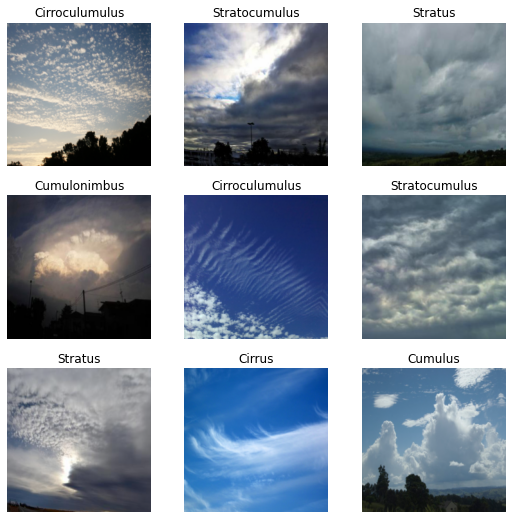

In [13]:
dls = dblock.dataloaders(path)
dls.show_batch()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0005754399462603033)

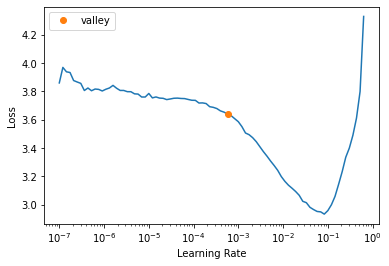

In [15]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()


In [16]:
learn.fine_tune(5, 3e-3)


### _45% error rate is high_

> #### _Keep calling the garbage collector as these models are large_

In [17]:
import gc
_ = gc.collect()


> ## Attempt 2
> ### Use Image data loaders, provide train and test data separately.
> ### Model used - Convnext_small_in22k
> ### Accuracy - 59-60%

In [18]:
dls_2 = ImageDataLoaders.from_folder(path, train = "train", valid = "test",vocab = dsets.vocab, bs = 64, item_tfms = Resize(300, method = ResizeMethod.Squish),
                  batch_tfms=aug_transforms(size= 224))
                  #batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])


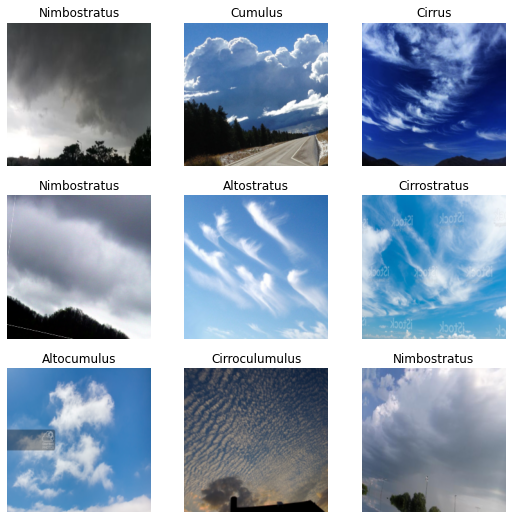

In [19]:
dls_2.show_batch()

In [21]:
learn_2 = vision_learner(dls_2, "convnext_small_in22k", model_dir="/tmp/model/", metrics=accuracy)


Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_small_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_small_22k_224.pth


In [22]:
learn_2.fine_tune(10, 3e-3)

In [23]:
learn_2.fine_tune(10, 3e-3)

In [24]:
learn_2.fine_tune(5, 3e-3)

> ### _Validation loss is very bumpy_

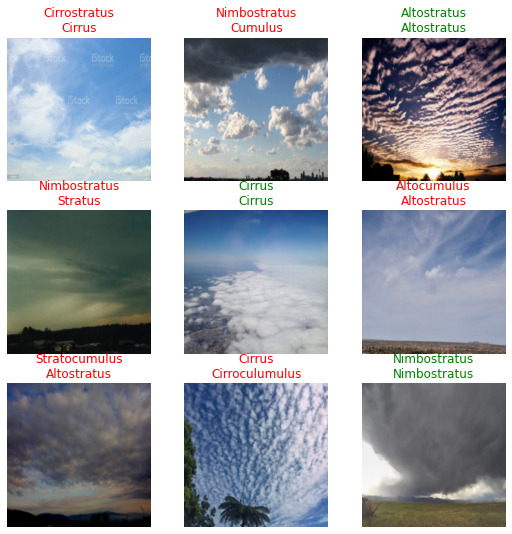

In [28]:
learn_2.show_results()


> ## Attempt 3
> ### Similar to attempt 2, change in bacth size and model 
> ### Model used - Convnext_tiny_hnf
> ### Accuracy - 59%

In [29]:
dls_3 = ImageDataLoaders.from_folder(path, train = "train", valid = "test",vocab = dsets.vocab, bs = 32, item_tfms = Resize(400, method = ResizeMethod.Squish),
                  batch_tfms=aug_transforms(size= 300))
                  #batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])


In [30]:
learn_3 = vision_learner(dls_3, "convnext_tiny_hnf", model_dir="/tmp/model/", metrics=accuracy)


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_tiny_hnf_a2h-ab7e9df2.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_hnf_a2h-ab7e9df2.pth


In [31]:
learn_3.fine_tune(10, 3e-3)

In [32]:
learn_3.fine_tune(5, 3e-3)

> ### _Not much improvement here_

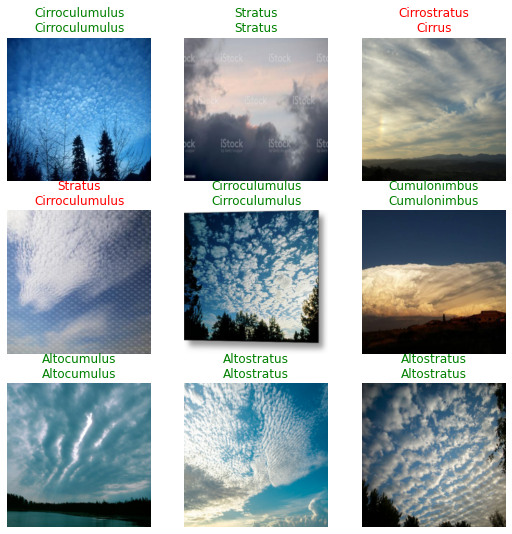

In [33]:
learn_3.show_results()

> ### _A lot of confused classes_
> #### Use interp = ClassificationInterpretation.from_learner(learn_3)


In [35]:
interp.most_confused(min_val =3)


[('Altocumulus', 'Cirroculumulus', 7),
 ('Stratus', 'Stratocumulus', 7),
 ('Altocumulus', 'Altostratus', 6),
 ('Stratocumulus', 'Stratus', 6),
 ('Cirrostratus', 'Altostratus', 5),
 ('Cirrostratus', 'Cirrus', 5),
 ('Cirrus', 'Cirrostratus', 5),
 ('Cumulus', 'Cumulonimbus', 4),
 ('Cirrostratus', 'Altocumulus', 3),
 ('Cirrostratus', 'Cirroculumulus', 3),
 ('Cumulonimbus', 'Cumulus', 3)]


> ## Attempt 4
> ### Train more, use default data augmentation and change model to convnext base
> ### Model used - Convnext_base
> ### Accuracy - 61%

In [36]:
dls_4 = ImageDataLoaders.from_folder(path, train = "train", valid = "test",vocab = dsets.vocab, bs = 32, item_tfms = Resize(128),
                  batch_tfms=aug_transforms())
                  #batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])


In [37]:
learn_4 = vision_learner(dls_4, "convnext_base", model_dir="/tmp/model/", metrics=accuracy)


Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_base_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_base_1k_224_ema.pth


> ### _Trained once and then train again_

In [38]:
learn_4.fine_tune(10, 3e-3)

In [39]:
turns = 2
for i in range(turns):
    learn_4.fine_tune(10, 3e-3)

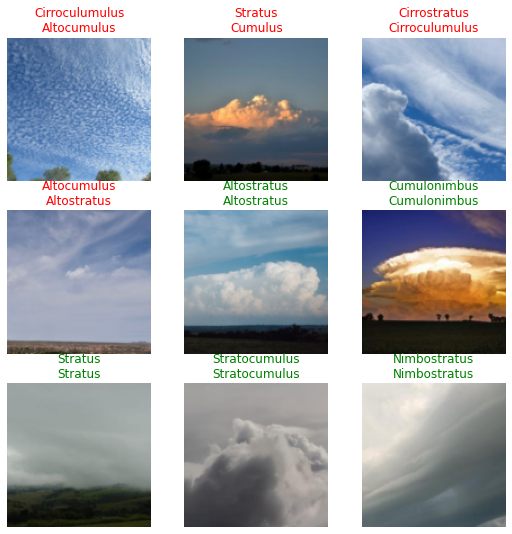

In [40]:
learn_4.show_results()

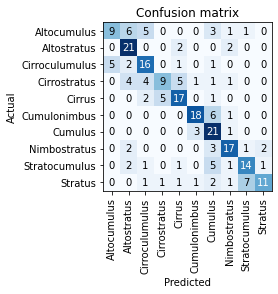

In [41]:
interp = ClassificationInterpretation.from_learner(learn_4)
interp.plot_confusion_matrix()


> ### _The confusion matrix shows that certain classes are prone to getting misclassified. Let's have one more attempt and then see what's happening_
> ## _Altocumulus, Stratus, Stratocumulus, and Cirrorstratus don't produce good results_


> ## Attempt 5
> ### Data augmentation according to Imagenet statistics
> ### Model used - Convnext_small_in22k
> ### Accuracy - 59%

### Empty the torch cache to avoid the CUDA out of memory error

In [40]:
torch.cuda.empty_cache()

In [44]:
dls_5 = ImageDataLoaders.from_folder(path, train = "train", valid = "test",vocab = dsets.vocab, bs = 64, item_tfms = Resize(300, method = ResizeMethod.Squish),
                  #batch_tfms=aug_transforms(size= 224))
                  batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])


In [45]:
learn_5 = vision_learner(dls_5, "convnext_small_in22k", model_dir="/tmp/model/", metrics=[accuracy])


In [46]:
turns = 2
for i in range(turns):
    learn_5.fine_tune(10, 3e-3)

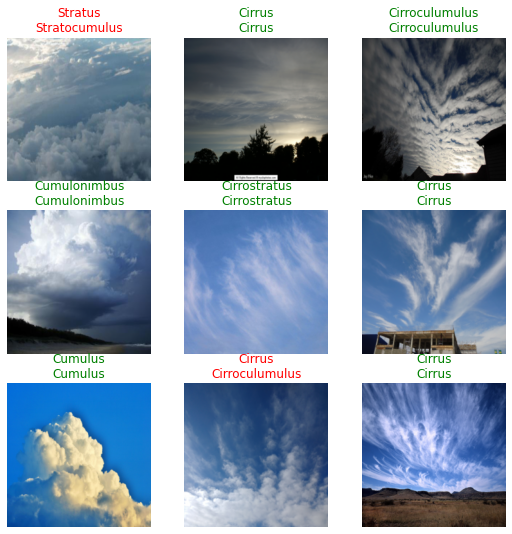

In [51]:
learn_5.show_results()

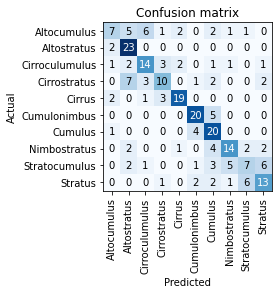

In [48]:
interp = ClassificationInterpretation.from_learner(learn_5)
interp.plot_confusion_matrix()


In [49]:
interp.most_confused(min_val =4)

[('Cirrostratus', 'Altostratus', 7),
 ('Altocumulus', 'Cirroculumulus', 6),
 ('Stratocumulus', 'Stratus', 6),
 ('Stratus', 'Stratocumulus', 6),
 ('Altocumulus', 'Altostratus', 5),
 ('Cumulonimbus', 'Cumulus', 5),
 ('Stratocumulus', 'Nimbostratus', 5),
 ('Cumulus', 'Cumulonimbus', 4),
 ('Nimbostratus', 'Cumulus', 4)]

> ## As it turns out that even in this iteration Altocumulus, Cirrostratus, and Stratocumulus are getting misclassified a lot

### I am no cloud expert, so googling to see the difference between these clouds.
### This [primer](http://https://www.weather.gov/media/lmk/soo/cloudchart.pdf) provides a quick overview.

> ### _Cirrostratus has a tendency to get misclassified in Cirro category clouds viz. Cirrus and Cirrocumulus. Also, it gets classified as Altostratus_

> ### _Similarly, Altocumulus looks a lot like Altostratus and Cirrocumulus. Thus, a lot of misclassification._

> ## There are other misclassifications too but for now, let's see how the model behaves when we remove two noisy classes out of the three. I choose Altocumulus and Cirrostratus randomly and would see the result.
> ### There should be better methods to improve the efficiency:
> - Remove noisy class
> - Balance the classes
> - Get more samples per class
> - Data preprocessing


> ### For now, let's remove the noisy class and see how the model performs

> # Changed Data
> ### The clouds directory has the updated data



> ## Attempt 6
> ### Build the model on updated dataset and use the parameters from the test that performed the best
> ### Model used - Convnext_small_in22k
> ### Accuracy - 70%

In [41]:

for dirname, _, filenames in os.walk('/kaggle/input/clouds/Clouds'):
    counter = 0
    for filename in filenames:
        counter = counter + 1
        #print(os.path.join(dirname, filename))
    print(f"Number of files loaded:{counter}")



Number of files loaded:0
Number of files loaded:0
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:25
Number of files loaded:0
Number of files loaded:106
Number of files loaded:112
Number of files loaded:107
Number of files loaded:100
Number of files loaded:162
Number of files loaded:106
Number of files loaded:163
Number of files loaded:100


In [42]:
path_n = Path('../input/clouds/Clouds')
path_n.ls()

(#2) [Path('../input/clouds/Clouds/test'),Path('../input/clouds/Clouds/train')]

> #### _This part isn't really needed, one can create a list of classes for dsets_n_

In [43]:
dblock_n = DataBlock(blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files, get_y = parent_label, splitter  = RandomSplitter(), item_tfms = Resize(300, method = ResizeMethod.Squish),
                  batch_tfms=aug_transforms(size= 224))

dsets_n = dblock_n.datasets(path_n)
dsets_n.vocab

['Altostratus', 'Cirroculumulus', 'Cirrus', 'Cumulonimbus', 'Cumulus', 'Nimbostratus', 'Stratocumulus', 'Stratus']

> ### _Use the same configuration of batch size 32, image resize, and batch transformations_

In [44]:
dls_6 = ImageDataLoaders.from_folder(path_n, train = "train", valid = "test",vocab = dsets_n.vocab, bs = 32, item_tfms = Resize(128),
                  batch_tfms=aug_transforms())

In [56]:
learn_6 = vision_learner(dls_6, "convnext_small_in22k", model_dir="/tmp/model/", metrics=accuracy)


> ### Try to retrain the entire model from scratch instead of using pretrained weights from the transfer learning model

In [57]:
learn_6.fit_one_cycle(3, 3e-3)


In [58]:
learn_6.unfreeze()


In [59]:
learn_6.fit_one_cycle(10)

> ### Not much improvement, fine tune to see if there is any change.

In [60]:
learn_6.fine_tune(10, 3e-3)

In [62]:
learn_6.fine_tune(10, 3e-3)

> ## _Validation loss is very bumpy_
> ## It can mean that the learning rate isn't set correctly.

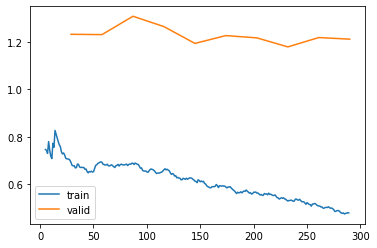

In [61]:
learn_6.recorder.plot_loss()

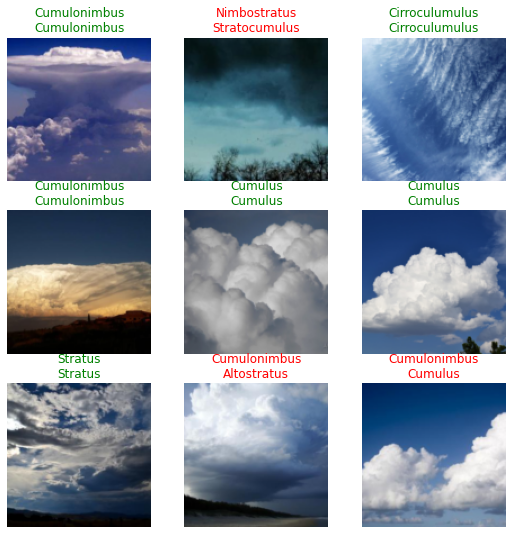

In [65]:
learn_6.show_results()

> ### The Confusion Matrix looks a little better than before

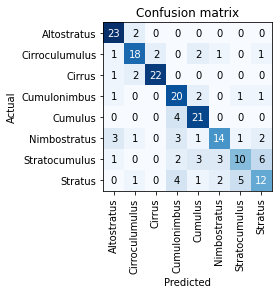

In [64]:
interp = ClassificationInterpretation.from_learner(learn_6)
interp.plot_confusion_matrix()


> ## Attempt 7
> ### Use a smaller model and use different learning rates
> ### Model used - Convnext_small
> ### Accuracy - 72.5%

In [66]:
dls_7 = ImageDataLoaders.from_folder(path_n, train = "train", valid = "test",vocab = dsets_n.vocab, bs = 32, item_tfms = Resize(224),
                  batch_tfms=aug_transforms())

In [67]:
learn_7 = vision_learner(dls_7, "convnext_small", model_dir="/tmp/model/", metrics=accuracy)


Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_small_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_small_1k_224_ema.pth


SuggestedLRs(valley=0.0014454397605732083)

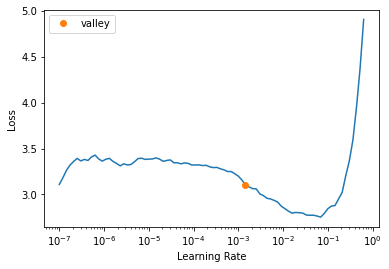

In [68]:
learn_7.lr_find()

> ### This has been a good lesson. Use high larger learning rate when you start the training and then decrease it progressively. 
> #### _FastAI provides discriminative learning rate using splice but we are doing it manually here_

In [69]:
lr = [2e-2, 3e-3]
for i in range(len(lr)):
    learn_7.fine_tune(10, lr[i])

> ### _Still a little bumpy validation loss but accuracy seems stable_

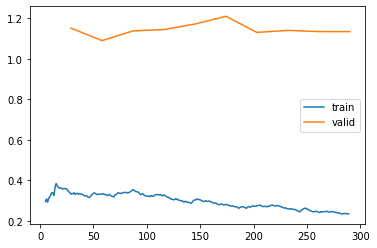

In [70]:
learn_7.recorder.plot_loss()

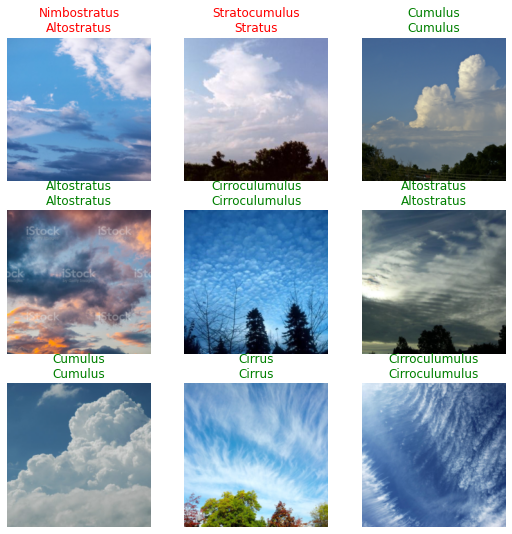

In [71]:
learn_7.show_results()

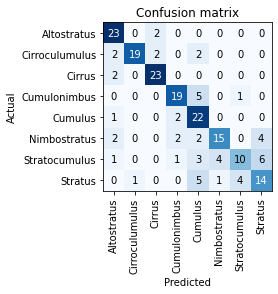

In [72]:
interp = ClassificationInterpretation.from_learner(learn_7)
interp.plot_confusion_matrix()

In [74]:
learn_7.loss_func

FlattenedLoss of CrossEntropyLoss()

In [75]:
learn_7.opt


> ## Attempt 8 - Final attempt
> ### Change the loss function; Decrease the size of the model
> ### Model used - Convnext_tiny
> ### Accuracy - 71.5%

In [46]:
dls_8 = ImageDataLoaders.from_folder(path_n, train = "train", valid = "test",vocab = dsets_n.vocab, bs = 32, item_tfms = Resize(224),
                  batch_tfms=aug_transforms(size= 128))

> ### The Binary cross entropy loss would penalise those preductions that are confident but wrong.

> ### Focal loss disccussed in this paper [https://arxiv.org/pdf/1708.02002.pdf](http://) provides more control over the penalisation with the help of a gamma parameter. Gamma = 0 behaves similar to Cross Entropy Loss but higher values of gamma (0 to 2) change this behaviour.


> ### Higher values of gamma down-weight easy examples’ contribution to loss

In [51]:
learn_8 = vision_learner(dls_8, "convnext_tiny", model_dir="/tmp/model/", loss_func= FocalLossFlat(gamma = 1.5),metrics=accuracy)


> ##### _Just checking whether loss function has updated or not!!! (Trust issues) :P_

In [52]:
learn_8.loss_func

FlattenedLoss of FocalLoss()

SuggestedLRs(valley=0.0004786300996784121)

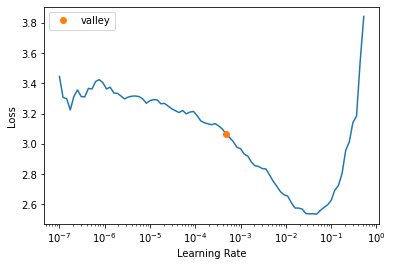

In [53]:
learn_8.lr_find()

> ### Use not only the discrimative learning rates but also decrease the amount of training for lower training rate

In [54]:
lr = [2e-2, 3e-3, 4e-4]
epoch_lst = [10, 8, 7]
for i in range(len(lr)):
    learn_8.fine_tune(epoch_lst[i], lr[i])

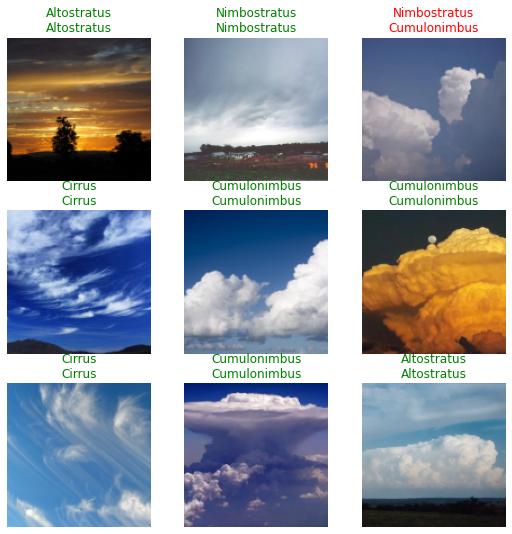

In [57]:
learn_8.show_results()

> ### _Hmmm...okayish results here, still many misclassifications in Stratus and Stratocumulus._

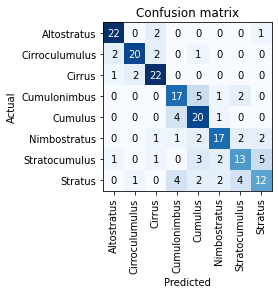

In [61]:
interp = ClassificationInterpretation.from_learner(learn_8)
interp.plot_confusion_matrix()

> #### _Out of all, Nimbostratus should not have any misclassifications. Nimbostartus are the dark clouds during the rainy days!!!_

In [62]:
interp.most_confused(min_val =4)

[('Cumulonimbus', 'Cumulus', 5),
 ('Stratocumulus', 'Stratus', 5),
 ('Cumulus', 'Cumulonimbus', 4),
 ('Stratus', 'Cumulonimbus', 4),
 ('Stratus', 'Stratocumulus', 4)]

## Testing Phase

> ### _Let's test on unseen data. All these images have been taken from the internet._
> ### _Please upload more images in the cloudtest directory for testing purpose_

> ### A Cirrus Cloud

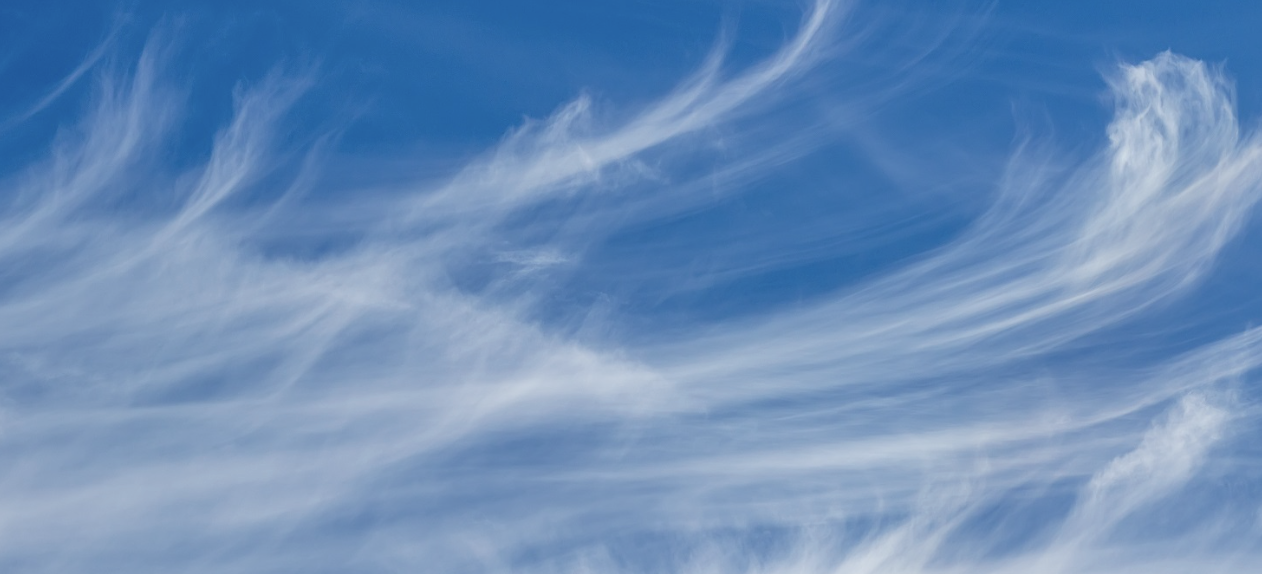

In [10]:
img_2 = PILImage.create("../input/cloudtest/Screenshot 2022-09-02 at 10.44.33 PM.png")
img_2

In [67]:
learn_8.predict(img_2)

('Cirrus',
 TensorBase(2),
 TensorBase([1.7253e-07, 3.9383e-04, 9.9961e-01, 1.5218e-07, 5.4315e-07, 2.1076e-08,
         1.6901e-07, 2.4720e-07]))

> ### Another Cirrus

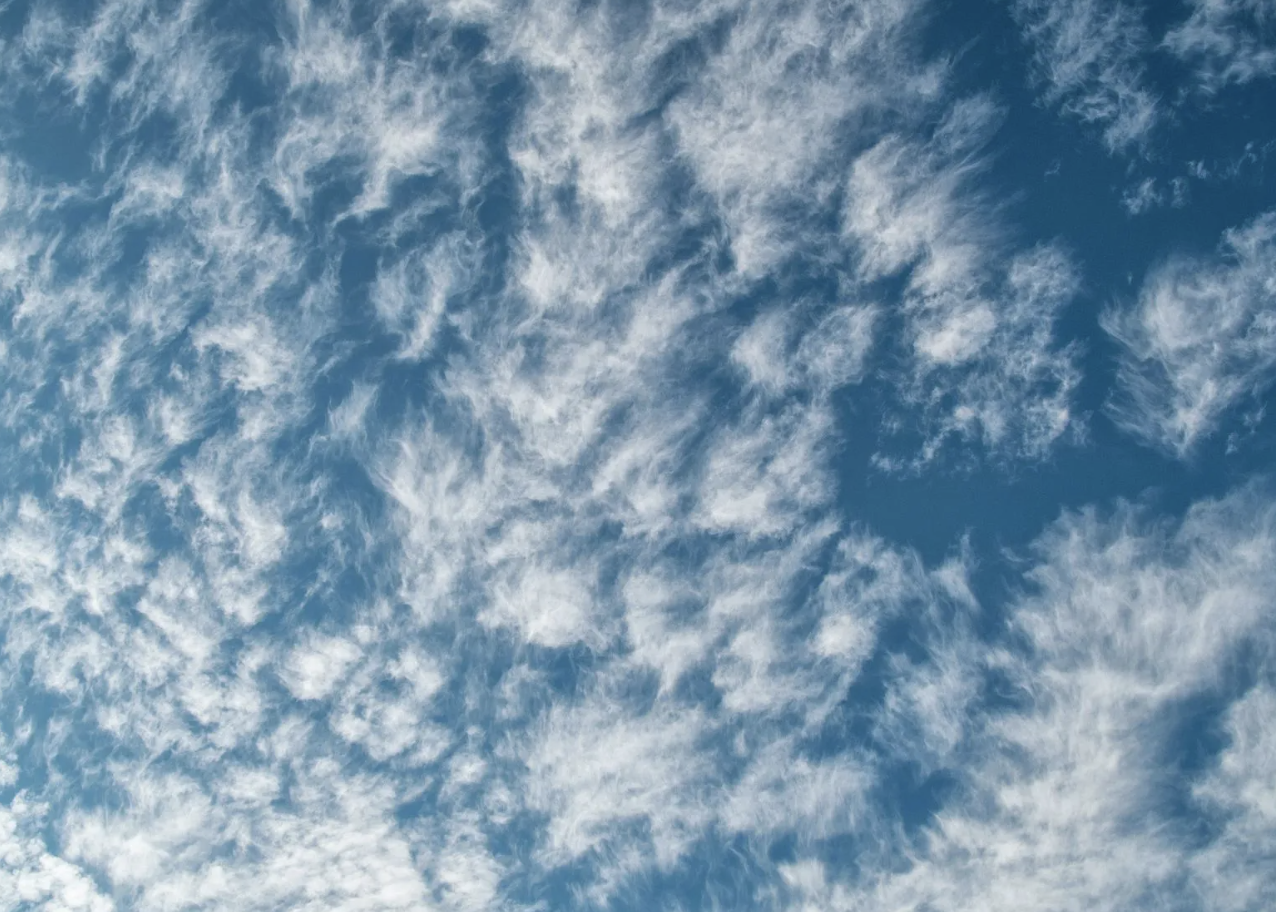

In [68]:
img_3 = PILImage.create("../input/cloudtest/Screenshot 2022-09-02 at 11.35.30 PM.png")
img_3

In [69]:
learn_8.predict(img_3)

('Cirrus',
 TensorBase(2),
 TensorBase([6.0119e-04, 3.1065e-01, 6.7279e-01, 1.9115e-04, 1.5691e-04, 5.5428e-03,
         4.2583e-03, 5.8062e-03]))

> ### A Cumulus Cloud

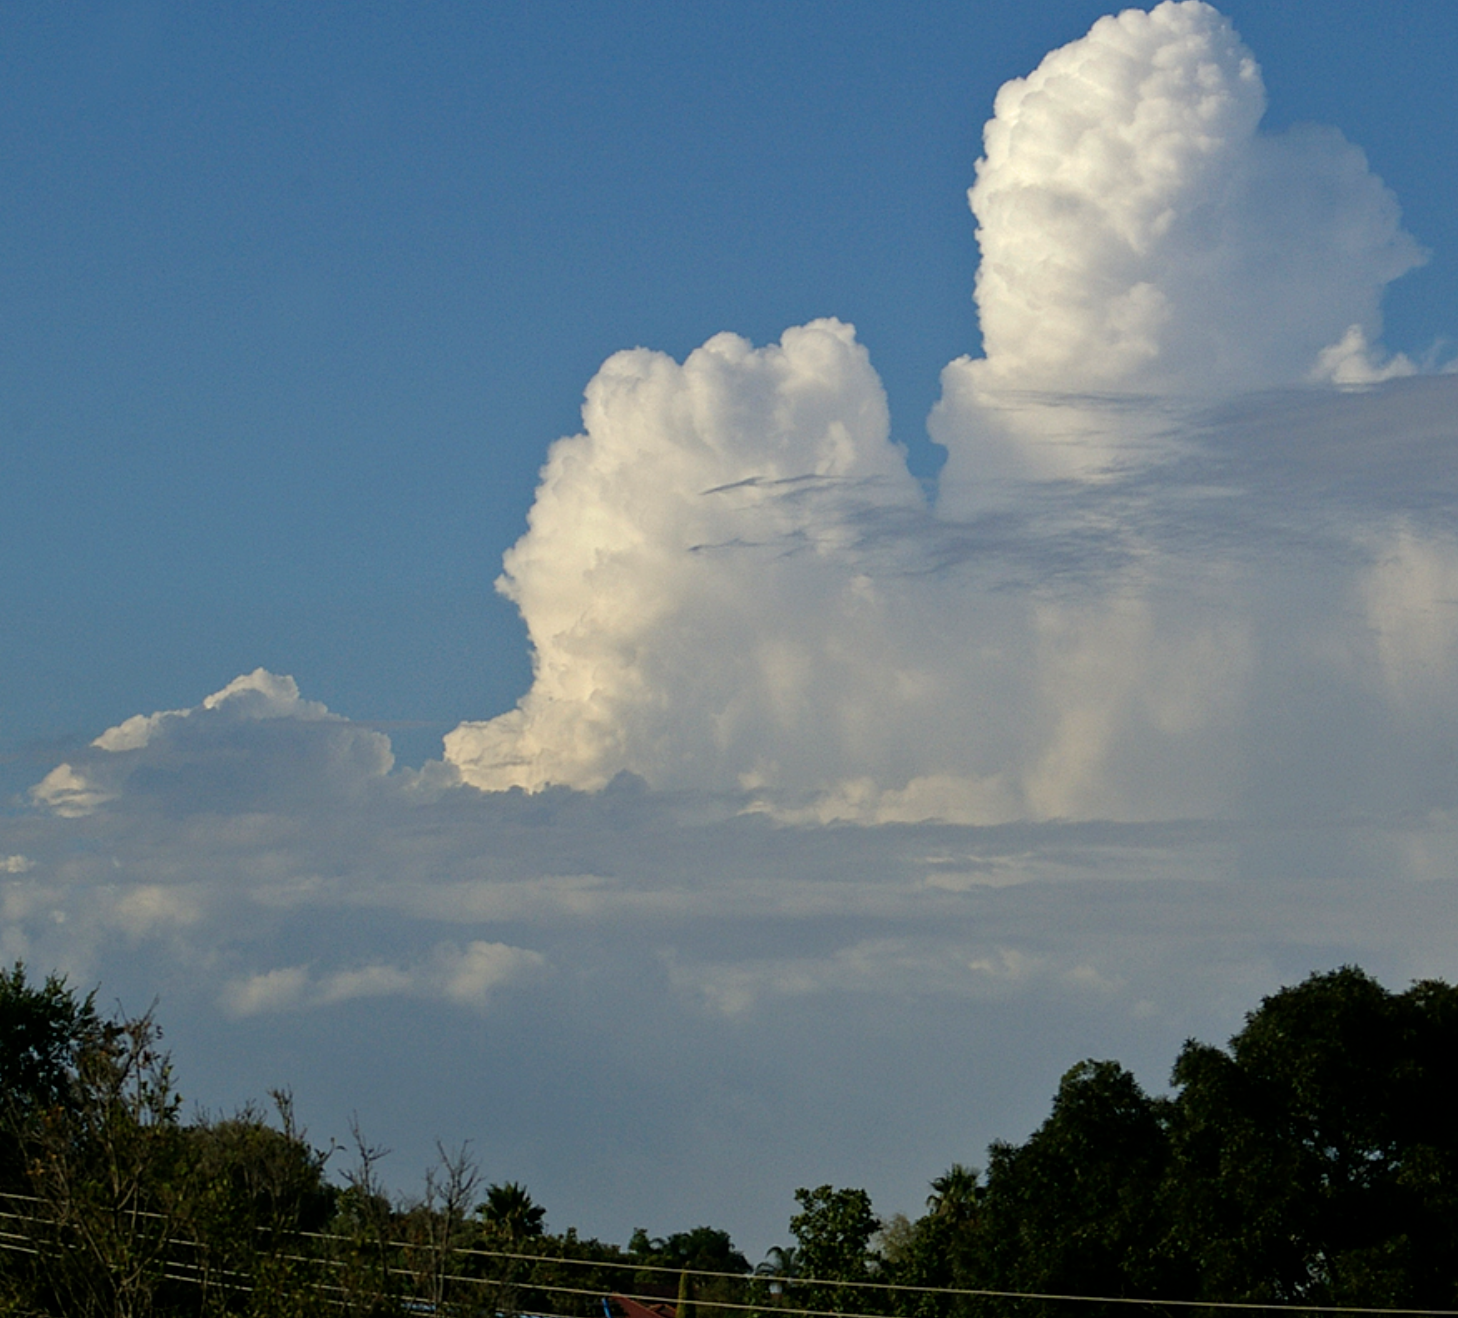

In [70]:
img_4 = PILImage.create("../input/cloudtest/Screenshot 2022-09-02 at 11.36.15 PM.png")
img_4

In [71]:
learn_8.predict(img_4)

('Cumulus',
 TensorBase(4),
 TensorBase([1.1306e-05, 1.1890e-06, 2.5026e-06, 1.8337e-03, 9.9480e-01, 3.3508e-03,
         1.7057e-06, 2.3660e-07]))

> ### The model correctly classified all the three unseen images. 
> ### It's only 72.5% correct, so it is bound to fail on 30% unless we make improvements.

> ### Let's check how the validation loss is behaving in the last model

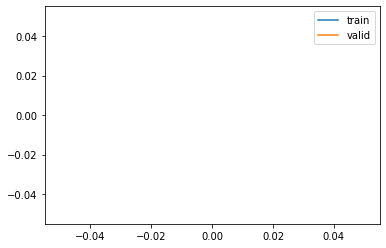

In [118]:
learn_8.recorder.plot_loss()

> ### It's empty because the recorder object is somehow empty. 
> ### Strange!!

In [117]:
learn_8.recorder.losses

[]

### Dirty work, create a dataframe from the epochs and train, valid_loss from the iterations above manually and plot

In [102]:
data = {'Epochs':  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        'train_loss': [1.365729,
1.218585,
1.123894,
1.093431,
0.954352,
0.795425,
0.675656,
0.543923,
0.431559,
0.366880,
0.168368,
0.161951,
0.163574,
0.162362,
0.164124
],
         'valid_loss': [1.222900,
0.952413,
1.245164,
1.219178,
1.016823,
0.980452,
0.715877,
0.732847,
0.700989,
0.680698,
0.690924,
0.702923,
0.694562,
0.700117,
0.698838],
        
        'accuracy' : [0.505000,
0.570000,
0.545000,
0.585000,
0.605000,
0.615000,
0.660000,
0.685000,
0.705000,
0.700000,
0.710000,
0.710000,
0.710000,
0.705000,
0.715000]
        
        }

df = pd.DataFrame(data)

df

Epochs  train_loss  valid_loss  accuracy
0        0    1.365729    1.222900     0.505
1        1    1.218585    0.952413     0.570
2        2    1.123894    1.245164     0.545
3        3    1.093431    1.219178     0.585
4        4    0.954352    1.016823     0.605
5        5    0.795425    0.980452     0.615
6        6    0.675656    0.715877     0.660
7        7    0.543923    0.732847     0.685
8        8    0.431559    0.700989     0.705
9        9    0.366880    0.680698     0.700
10      10    0.168368    0.690924     0.710
11      11    0.161951    0.702923     0.710
12      12    0.163574    0.694562     0.710
13      13    0.162362    0.700117     0.705
14      14    0.164124    0.698838     0.715

> ## _Shows a decent picture that how validation loss decreased and with that the accuracy increased._

> ## _I prefer this version that attempt 7 as the validation loss seems much lower and accuracy doesn't suffer too greatly._

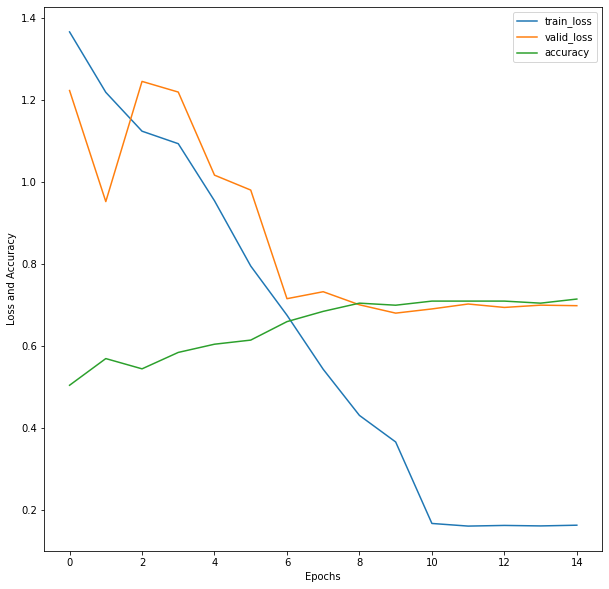

In [115]:
plt.figure(figsize=(10, 10))
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.plot(df['train_loss'], label = "train_loss")
plt.plot(df['valid_loss'], label = "valid_loss")
plt.plot(df['accuracy'], label = "accuracy")
plt.legend()
plt.show()

In [92]:
learn_8.recorder.metric_names

(#5) ['epoch','train_loss','valid_loss','accuracy','time']

array([[22,  0,  2,  0,  0,  0,  0,  1],
       [ 2, 20,  2,  0,  1,  0,  0,  0],
       [ 1,  2, 22,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  5,  1,  2,  0],
       [ 0,  0,  0,  4, 20,  1,  0,  0],
       [ 0,  0,  1,  1,  2, 17,  2,  2],
       [ 1,  0,  1,  0,  3,  2, 13,  5],
       [ 0,  1,  0,  4,  2,  2,  4, 12]])

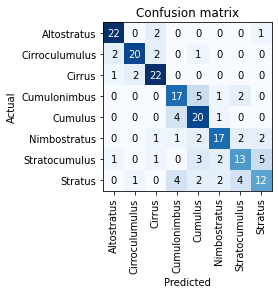

In [139]:
cm = interp.confusion_matrix()
interp.plot_confusion_matrix()
cm 

## As this is a classification problem, let's check the precision, recall, and F1 score

In [154]:
tp = cm.diagonal()

fn = cm.sum(1) - tp
fp = cm.sum(0) - tp

precision = tp / (tp + fp)
recall = tp / (tp + fn)


In [155]:
recall

array([0.88, 0.8 , 0.88, 0.68, 0.8 , 0.68, 0.52, 0.48])

### Precision : It is the quantity of the right predictions that the model made. It doesn't consider the wrong predictions made by the model. 

In [157]:
precision

array([0.84615385, 0.86956522, 0.78571429, 0.65384615, 0.60606061,
       0.73913043, 0.61904762, 0.6       ])

### An ideal system with high precision and high recall will return many results, with all results labeled correctly.

In [158]:
np.sum(precision), np.sum(recall)

(5.719518162996424, 5.720000000000001)

In [15]:
print("Precision for the Model : ", 0.715)
print("Recall for the Model :", 0.715)

Precision for the Model :  0.715
Recall for the Model : 0.715


### F1 score is the harmonic mean of precision and recall and balances precision and recall, a value close to 1 is desirable

In [169]:
f1 = (2* precision * recall)/(precision+recall)
f1

array([0.8627451 , 0.83333333, 0.83018868, 0.66666667, 0.68965517,
       0.70833333, 0.56521739, 0.53333333])

In [170]:
np.mean(f1)

0.7111841259586632

#### 0.711 as F1 score. It's not great but ok!

> ## _There are many things that can be done to improve the model but would require a long time and most of it would be in data prep. For now, I am moving on and might come back to check on it again._

# End of Notebook
